### Assignment[-1] : The last assignment
목적: 학습된 모델을 불러와서 이미지를 테스트해봅니다.

In [1]:
import socket
hostname = socket.gethostname()
print(hostname)

seung-BMDX5


In [2]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [3]:
tf.__version__, tf.keras.__version__

('2.3.0', '2.4.0')

In [4]:
from nnutil_20 import imshow
from nnutil_20 import center_crop
from nnutil_20 import random_crop

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

### 학습된 모델 불러오기

In [6]:
model_fn = 'handpose_224.h5'

In [7]:
model = keras.models.load_model(model_fn)

잘 불러와졌는지 확인해봅니다.

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

In [9]:
n_classes = model.get_layer('dense_1').output_shape[-1] 
print(n_classes)
# 마지막 레이어의 형상이 6인데, 이를 클래스 갯수로 활용
# https://stackoverflow.com/a/49527269

6


### 테스트할 사진 불러오기

테스트 용으로 제공하였습니다

In [10]:
import glob
types = ('*.jpg', '*.JPG', '*.png') # the tuple of file types
files_grabbed = []

for fmt in types:
    files_grabbed.extend(glob.glob('./dataset_test/'+fmt))

In [11]:
print('#인덱스\t파일이름')
for idx,fn in enumerate(files_grabbed):
    print(idx, '\t', fn)

#인덱스	파일이름
0 	 ./dataset_test/class0_00.jpg
1 	 ./dataset_test/class3_01.jpg
2 	 ./dataset_test/class1_01.jpg
3 	 ./dataset_test/20190523_madong.jpg
4 	 ./dataset_test/KakaoTalk_20190529_211825276_01.jpg
5 	 ./dataset_test/20190529_092016.jpg
6 	 ./dataset_test/class5_02.jpg
7 	 ./dataset_test/class3_03.jpg
8 	 ./dataset_test/20171128101824.jpg
9 	 ./dataset_test/class2_03.jpg
10 	 ./dataset_test/class0_01.jpg
11 	 ./dataset_test/20190527_205327.jpg
12 	 ./dataset_test/class5_00.jpg
13 	 ./dataset_test/class2_00.jpg
14 	 ./dataset_test/class4_00.jpg
15 	 ./dataset_test/class1_02.jpg
16 	 ./dataset_test/class5_01.jpg
17 	 ./dataset_test/class3_02.jpg
18 	 ./dataset_test/class2_02.jpg
19 	 ./dataset_test/20190528_152242.jpg
20 	 ./dataset_test/class2_01.jpg
21 	 ./dataset_test/class4_01.jpg
22 	 ./dataset_test/20190529_153704.jpg
23 	 ./dataset_test/class1_00.jpg
24 	 ./dataset_test/class3_00.jpg
25 	 ./dataset_test/20190529_180722(2).jpg
26 	 ./dataset_test/class4_02.jpg
27 	 ./dataset_t

<b>아래의 idx 변수를 바꾸어</b> 기존 제공된 데이터를 테스트해보세요

In [12]:
idx = 33 #인덱스를 위의 셀 결과를 참고하여 바꾸어 보세요. 
fn_test = files_grabbed[idx] 
print(fn_test)

./dataset_test/IMG_9821.JPG


In [13]:
f=1.0# 약간 변경 가능 예) 1.0 ~1.3 사이
target_size=(int(300//f), int(400//f))
print(target_size)

(300, 400)


In [14]:
img = keras.preprocessing.image.load_img(fn_test, target_size=target_size)
input_arr = keras.preprocessing.image.img_to_array(img)

input_arr = input_arr/255.0
print(input_arr.shape)

(300, 400, 3)


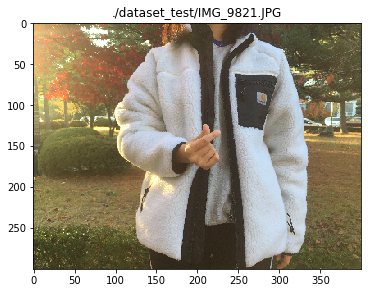

In [15]:
imshow(input_arr, title=fn_test)

### 이미지를 정사각형으로 잘라서 테스트 해보기
실제 학습할 때 아래처럼 정사각형 형태로 잘라서 학습을 하였습니다.

In [16]:
# 아래의 숫자를 변경하지 마세요.
w = 224 # 줄여진 그림을 (w, w) 크기로 crop

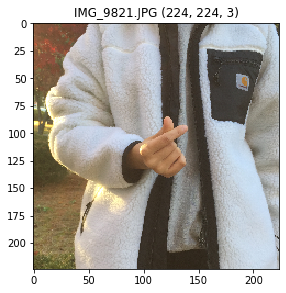

In [17]:
img_square = center_crop(input_arr, crop_size=(w,w))
#img_square = random_crop(input_arr, crop_size=(100,100))
imshow(img_square, title='{} {}'.format(fn_test.split('/')[-1], img_square.shape))

In [18]:
#input_arr = keras.preprocessing.image.img_to_array(img_square)
input_sqaure_arr = np.array([img_square]) #Convert single image to a batch.
print(input_sqaure_arr.shape)

(1, 224, 224, 3)


In [19]:
predictions_array =  model.predict(input_sqaure_arr)
max_idx = np.argmax(predictions_array[0]) #batch 를 고려해서 [0] 번째 를 명시함
max_prob = np.max(predictions_array[0]) #batch 를 고려해서 [0] 번째 를 명시함

Text(0.5, 1.0, 'IMG_9821.JPG/ Pred.: #4 --> 99.8361%')

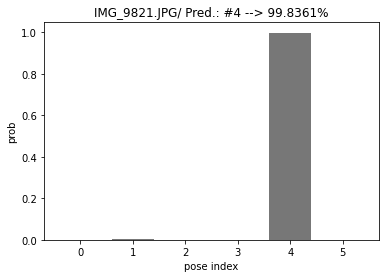

In [20]:
plt.bar(range(n_classes), predictions_array[0], color="#777777")
plt.ylabel('prob')
plt.xlabel('pose index')
plt.title('{}/ Pred.: #{} --> {:.4f}%'.format(fn_test.split('/')[-1], max_idx, max_prob*100.0))

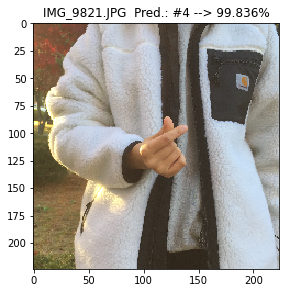

In [21]:
imshow(img_square, title='{}  Pred.: #{} --> {:.3f}%'.format(fn_test.split('/')[-1],  max_idx, max_prob*100.0))

### TODO
* 이미지를 바꾸어가며 테스트를 해보세요. 여러분이 새롭게 사진을 찍고 넣은 뒤 테스트 해보세요. 이미지는 아래 폴더에 넣어두면 됩니다.
```
dataset_test
```
* 주의 1: Dataset 과제로 제출한 사진이 아니어야함. 
* 주의 2: 본 과제에서는 제한된 분량의 사진을 이용하여 비교적 단순한 네트워크를 학습하였습니다. <br/>
따라서 모든 hand gesture 를 이해할 수 있지는 못합니다. 여러분의 학습 목적을 위해 구성된 코드이므로 가급적 과제에서 찍었던 것과 유사한 구도로 찍어보면 이해에 도움이 될 것입니다.
* 주의 3 : 리눅스 시스템은 파일명의 대소문자를 구분합니다. 확장자가 jpg 인지, JPG 인지 확인해보세요
* 아래 두 셀의 내용을 지우고 위의 예처럼 본인의 사진 혹은 본인이 찍은 사진을 올리고 성공적으로 되는 예, 실패하는 예를 각각 구현해주세요. 그리고 실패가 되었다면, 어떤 클래스로 분류가 되었는데, 그 이유는 무엇일지 각각 고찰해주세요. <u>(각 1.5점)</u>

### test 함수

In [22]:
def test_img(f_name):
    img = keras.preprocessing.image.load_img(fn_test, target_size=target_size)
    input_arr = keras.preprocessing.image.img_to_array(img)

    input_arr = input_arr/255.0
    
    #crop
    img_square = center_crop(input_arr, crop_size=(w,w))
    
    #Convert single image to a batch.
    input_sqaure_arr = np.array([img_square]) 
    
    #predict
    predictions_array =  model.predict(input_sqaure_arr)
    max_idx = np.argmax(predictions_array[0]) #batch 를 고려해서 [0] 번째 를 명시함
    max_prob = np.max(predictions_array[0]) #batch 를 고려해서 [0] 번째 를 명시함
    
    imshow(img_square, title='{} {}'.format(fn_test.split('/')[-1], img_square.shape))
    plt.bar(range(n_classes), predictions_array[0], color="#777777")
    plt.ylabel('prob')
    plt.xlabel('pose index')
    plt.title('{}/ Pred.: #{} --> {:.4f}%'.format(fn_test.split('/')[-1], max_idx, max_prob*100.0))


### 성공적으로 추론 되는 예 (1.5 pts)
아래 셀들을 구현 하면 됩니다.

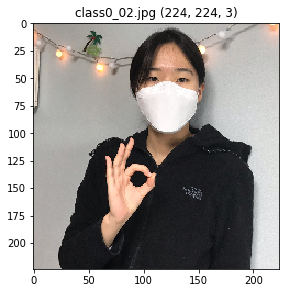

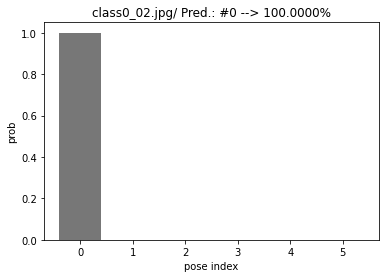

In [23]:
fn_test = 'dataset_test/class0_02.jpg'  # 여러분의 새로운 파일로 대체해주세요. 
test_img(fn_test)

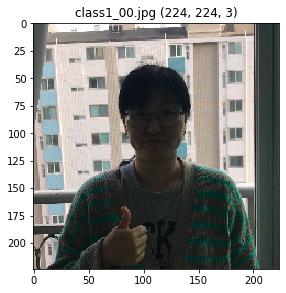

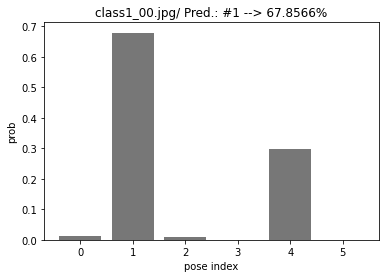

In [24]:
fn_test = 'dataset_test/class1_00.jpg'  
test_img(fn_test)

정답을 맞췄지만, 손가락하트와 조금 헷갈려한다.

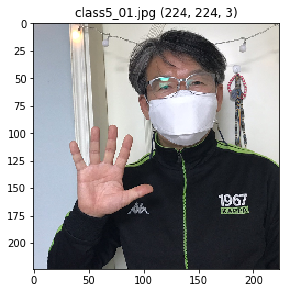

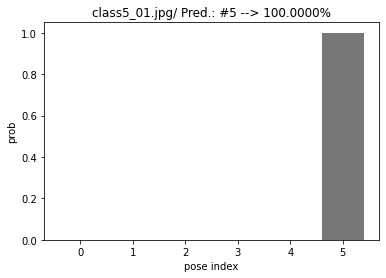

In [25]:
fn_test = 'dataset_test/class5_01.jpg'  
test_img(fn_test)

### 추론 실패하는 예 (1.5 pts)
아래 셀들을 구현 하면 됩니다.

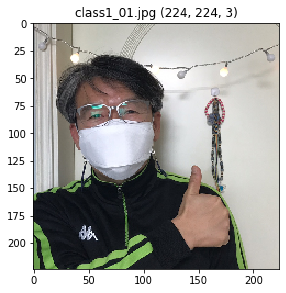

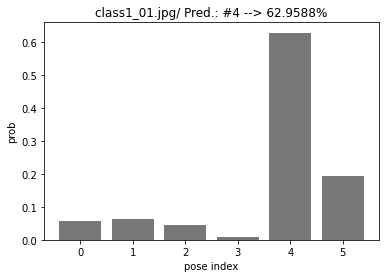

In [26]:
fn_test = 'dataset_test/class1_01.jpg'  
test_img(fn_test)

Class1(엄지)를 Class4(손가락하트)로 분류했다.   
* 손가락하트와 엄지 모두 손을 말아쥐고 손가락을 조금 펼치는 동작이어서 비슷한 모습에 헷갈리는 것같다. 
* 이 사진의 경우 왼쪽 어깨에 손을 올렸는데, train데이터 대부분이 몸 오른쪽에 손이 위치하기 때문에 그 영향도 있을 것 같다

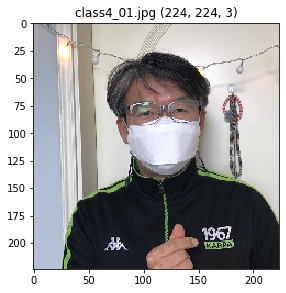

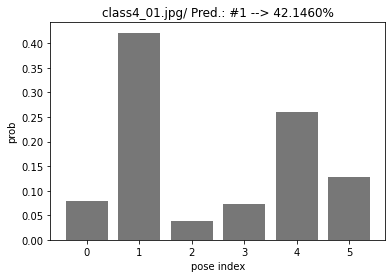

In [27]:
fn_test = 'dataset_test/class4_01.jpg'  
test_img(fn_test)

위의 경우와 마찬가지로 class1(엄지)와 class4(손가락하트)를 헷갈려한다.
* 비슷한 모양이기 때문에 헷갈렸을 것 같으며,
* 손 위치가 너무 아래로 내려와 있는데, 그 영향도 있을 것 같다.  
그래도 class1다음으로 class4가 높은 확률로 나왔다.

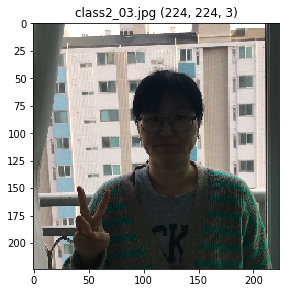

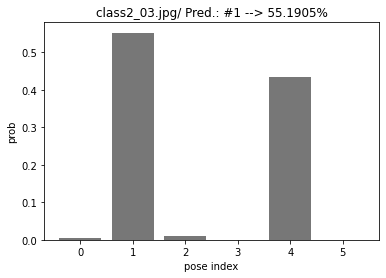

In [28]:
fn_test = 'dataset_test/class2_03.jpg'  
test_img(fn_test)

class2(브이)를 class1(엄지)로 헷갈려한다. 놀랍게도 class1다음으로 class4가 높은 확률로 나온다.  
* 엄지, 브이, 손가락하트 모두 주먹을 쥐고 손가락 몇 개를 피는 동작이어서 비슷한 모양에 헷갈리는 것 같다.
* 한쪽 손가락이 조금 어두워서 엄지 모양과 비슷해보였을 수도 있을 것 같다.